<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>


    
Thank you for your diligence on this and other sprints! I am very glad to see your progress 😊 I hope you enjoyed working on all these projects and learning data science. 
    
    
    
Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Sabrina! Congratulations on submitting the Final project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. 


- You did a great job on building a good model for churn prediction.


- The notebook demonstrates strong fundamentals: clean data merging, thoughtful preprocessing, train-test splitting, and meaningful evaluation using AUC-ROC and accuracy.


    
- It is very good that you add EDA. Distributions and feature correlations may provide helpful context before modeling. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
    
    
    
- Hyperparameters tuning was implemented correctly, good! 
    
    

- The conclusions clearly describe the results, well done! 
 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 

</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. More specifically: would you please drop duplicates after you drop columns and would you please transform test features? 

</div> 

<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you demonstrated strong analytical and coding skills by preparing the data, training the models and analyzing the results. The conclusions are strong: not only do they clearly summarize the results but also highlight key insights. This shows a good understanding of both business relevance and model limitations. There're two issues that need your attention, but the updates should not take much time. Feel free to ask questions if you have any 😉
    


</div>

# Telecom Churn Prediction

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Consider adding an introduction to enhance the readability of your project :) 

</div>

In [89]:
# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.utils import resample

In [2]:
# Load datasets
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

# Preprocessing

Clean data to prepare for modeling.

In [3]:
# === Merge Datasets ===
merged_df = contract_df.merge(personal_df, on='customerID', how='left') \
                       .merge(phone_df, on='customerID', how='left') \
                       .merge(internet_df, on='customerID', how='left')

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    

Correct! 
</div>

In [4]:
# Get a general overview of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [5]:
merged_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
# Function to convert CamelCase or PascalCase to snake_case
def camel_to_snake(name):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()

# Apply it to all column names
merged_df.columns = [camel_to_snake(col) for col in merged_df.columns]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice code! Do you need to create a function here?

      
You can convert columns to snake case using the following piece of code: 
    
    
    df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower()

    
</div>

In [7]:
# Check changes applied
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_i_d       7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  multiple_lines     6361 non-null   object 
 13  internet_service   5517 non-null   object 
 14  online_security    5517 non-null   object 
 15  online_backup      5517 non-null   object 
 16  device_protection  5517 

In [8]:
# Correct two column formats
merged_df.rename(columns={
    'customer_i_d': 'customer_id',
    'streaming_t_v': 'streaming_tv'
}, inplace=True)

In [9]:
# Apply transformation only to object (string) columns
for col in merged_df.select_dtypes(include='object').columns:
    merged_df[col] = merged_df[col].str.strip().str.lower().str.replace(' ', '_')

# Check changes applied
merged_df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic_check,29.85,29.85,female,0,yes,no,NaN,dsl,no,yes,no,no,no,no
1,5575-gnvde,2017-04-01,no,one_year,no,mailed_check,56.95,1889.5,male,0,no,no,no,dsl,yes,no,yes,no,no,no
2,3668-qpybk,2019-10-01,2019-12-01_00:00:00,month-to-month,yes,mailed_check,53.85,108.15,male,0,no,no,no,dsl,yes,yes,no,no,no,no
3,7795-cfocw,2016-05-01,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,male,0,no,no,NaN,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,2019-09-01,2019-11-01_00:00:00,month-to-month,yes,electronic_check,70.70,151.65,female,0,no,no,no,fiber_optic,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,2018-02-01,no,one_year,yes,mailed_check,84.80,1990.5,male,0,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes
7039,2234-xaduh,2014-02-01,no,one_year,yes,credit_card_(automatic),103.20,7362.9,female,0,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes
7040,4801-jzazl,2019-03-01,no,month-to-month,yes,electronic_check,29.60,346.45,female,0,yes,yes,NaN,dsl,yes,no,no,no,no,no
7041,8361-ltmkd,2019-07-01,2019-11-01_00:00:00,month-to-month,yes,mailed_check,74.40,306.6,male,1,yes,no,yes,fiber_optic,no,no,no,no,no,no


In [10]:
# List of columns to fill
internet_service_cols = [
    'internet_service', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

# Fill missing values with 'no_internet_service'
merged_df[internet_service_cols] = merged_df[internet_service_cols].fillna('no_internet_service')

In [11]:
# Fill missing values with 'no_phone_service'
merged_df['multiple_lines'] = merged_df['multiple_lines'].fillna('no_phone_service')

In [12]:
# Convert 'begin_date' column to datetime format
merged_df['begin_date'] = pd.to_datetime(merged_df['begin_date'], errors='coerce')

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [14]:
# Convert 'total_charges' column into a float64 type
merged_df['total_charges'] = pd.to_numeric(merged_df['total_charges'], errors='coerce')

### Preprocessing Summary

To prepare the data for modeling, I began by merging all four original datasets into a single DataFrame called merged_df. I then cleaned up the column names by converting them from camel case to snake case and lowercasing them for consistency. In addition, I standardized all object-type columns by making their values lowercase and replacing any spaces with underscores, making the dataset more uniform and easier to work with programmatically.

The begin_date column was converted to datetime format so it could be used in time-based calculations, such as determining customer tenure. For service-related columns like internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, and streaming_movies, I filled missing values with 'no_internet_service'. This approach preserves the distinction between customers who are ineligible for these services due to not having internet, and those who simply opted out. Similarly, I filled missing values in the multiple_lines column with 'no_phone_service', to clearly separate those without phone service from those who just don’t have multiple lines.

These steps ensure the data is clean, consistent, and ready for reliable analysis and model training, while preserving meaningful differences in customer access to services.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 
    
</div>


# Feature Engineering

Prepare the data to bring more clarity during visualizations and for optimizing it to produce the best results during training.

### Target Creation

In [15]:
# Create a target variable where 'no' or 0 = has not churned and 'date' or 1 = has churned
merged_df['churn'] = merged_df['end_date'].apply(lambda x: 0 if x == 'no' else 1)

### Feature Creation

In [16]:
# Define the cutoff date (e.g., data snapshot date)
cutoff_date = pd.to_datetime('2020-02-01')

# Calculate tenure in months and create a new column
merged_df['tenure_months'] = ((cutoff_date - merged_df['begin_date']).dt.days // 30).astype(int)

In [17]:
# Create a long_term_contract column that excludes month-to-month contracts( 0 =  month to month, 1 = one and two year)
merged_df['long_term_contract'] = merged_df['type'].apply(lambda x: 0 if x == 'month-to-month' else 1)

In [18]:
# Create an new feature for internet and tv
merged_df['internet_tv_combo'] = merged_df['internet_service'] + '_' + merged_df['streaming_tv']

In [19]:
# Create a new feature for contract type and tech support
merged_df['contract_support_combo'] = merged_df['type'].astype(str) + '_' + merged_df['tech_support'].astype(str)

In [20]:
# Create new feature to represent average monthly charges
merged_df['total_charges'] = pd.to_numeric(merged_df['total_charges'], errors='coerce')
merged_df['avg_monthly_charge'] = (merged_df['total_charges'] / merged_df['tenure_months']).fillna(0)

In [21]:
# Define service columns
service_cols = ['online_security', 'online_backup', 'tech_support', 'streaming_tv', 'streaming_movies']

# Create a new feature to count services
merged_df['service_count'] = merged_df[service_cols].apply(lambda row: sum(val == 'yes' for val in row), axis=1)

In [22]:
# Create a new feature for charges per service
merged_df['charge_per_service'] = merged_df['monthly_charges'] / merged_df['service_count'].replace(0, 1)

In [23]:
# View the changes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7043 non-null   object        
 1   begin_date              7043 non-null   datetime64[ns]
 2   end_date                7043 non-null   object        
 3   type                    7043 non-null   object        
 4   paperless_billing       7043 non-null   object        
 5   payment_method          7043 non-null   object        
 6   monthly_charges         7043 non-null   float64       
 7   total_charges           7032 non-null   float64       
 8   gender                  7043 non-null   object        
 9   senior_citizen          7043 non-null   int64         
 10  partner                 7043 non-null   object        
 11  dependents              7043 non-null   object        
 12  multiple_lines          7043 non-null   object  

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    

Very good! </div>

### Encoding

In [24]:
# Make a copy of the original DataFrame before encoding
merged_df_encoded = merged_df.copy()

# Binary columns (Yes/No → 1/0)
binary_cols = ['partner', 'dependents', 'paperless_billing']

for col in binary_cols:
    merged_df_encoded[col] = merged_df_encoded[col].map({'yes': 1, 'no': 0})

In [25]:
# Gender: binary as well
merged_df_encoded['gender'] = merged_df_encoded['gender'].map({'female': 0, 'male': 1})

# Contract Type: ordinal encoding
contract_map = {'month-to-month': 0, 'one_year': 1, 'two_year': 2}
merged_df_encoded['contract_type'] = merged_df_encoded['type'].map(contract_map)

In [26]:
merged_df_encoded

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,streaming_movies,churn,tenure_months,long_term_contract,internet_tv_combo,contract_support_combo,avg_monthly_charge,service_count,charge_per_service,contract_type
0,7590-vhveg,2020-01-01,no,month-to-month,1,electronic_check,29.85,29.85,0,0,...,no,0,1,0,dsl_no,month-to-month_no,29.850000,1,29.8500,0
1,5575-gnvde,2017-04-01,no,one_year,0,mailed_check,56.95,1889.50,1,0,...,no,0,34,1,dsl_no,one_year_no,55.573529,1,56.9500,1
2,3668-qpybk,2019-10-01,2019-12-01_00:00:00,month-to-month,1,mailed_check,53.85,108.15,1,0,...,no,1,4,0,dsl_no,month-to-month_no,27.037500,2,26.9250,0
3,7795-cfocw,2016-05-01,no,one_year,0,bank_transfer_(automatic),42.30,1840.75,1,0,...,no,0,45,1,dsl_no,one_year_yes,40.905556,2,21.1500,1
4,9237-hqitu,2019-09-01,2019-11-01_00:00:00,month-to-month,1,electronic_check,70.70,151.65,0,0,...,no,1,5,0,fiber_optic_no,month-to-month_no,30.330000,0,70.7000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,2018-02-01,no,one_year,1,mailed_check,84.80,1990.50,1,0,...,yes,0,24,1,dsl_yes,one_year_yes,82.937500,4,21.2000,1
7039,2234-xaduh,2014-02-01,no,one_year,1,credit_card_(automatic),103.20,7362.90,0,0,...,yes,0,73,1,fiber_optic_yes,one_year_no,100.861644,3,34.4000,1
7040,4801-jzazl,2019-03-01,no,month-to-month,1,electronic_check,29.60,346.45,0,0,...,no,0,11,0,dsl_no,month-to-month_no,31.495455,1,29.6000,0
7041,8361-ltmkd,2019-07-01,2019-11-01_00:00:00,month-to-month,1,mailed_check,74.40,306.60,1,1,...,no,1,7,0,fiber_optic_no,month-to-month_no,43.800000,0,74.4000,0


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]), so well done! 

    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

</div>
<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Student's comment </b>
    
I decided to take these suggestions by using using ohe for logistic regression and ordinal encoding for the tree based models instead of get_dummies.

</div>


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Good! 

</div>

In [30]:
#merged_df_ohe.columns

### Feature Engineering Summary

As part of the feature engineering process, I created a new target variable called churn to represent whether a customer has left the company. Customers with 'no' in the original end_date column were labeled as 0 (still active), while those with an actual date were labeled as 1 (churned).

To capture customer loyalty over time, I calculated each customer's tenure in months and added a new column called tenure_months, measuring the length of their relationship with the company. I also created a long_term_contract column to highlight commitment levels, where customers with month-to-month contracts were labeled as 0 and those with one- or two-year contracts were labeled as 1.

Overall, I created the following new columns; churn, tenure_months, long_term_contract, internet_tv_combo, contract_support_combo, avg_monthly_charge, service_count and charge_per_service. This highlightes nuance relationships.

For modeling purposes, I applied two types of encoding. The first, stored in merged_df_ohe, uses one-hot encoding and is optimized for logistic regression models. The second, stored in merged_df_encoded, uses label encoding and is designed for use with tree-based models such as Random Forest, XGBoost, and LightGBM. This dual approach ensures that the data is properly formatted and tailored to the specific needs of each algorithm.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 
</div>

# Visualizations

### Churn Class Distribution

0    0.73463
1    0.26537
Name: churn, dtype: float64


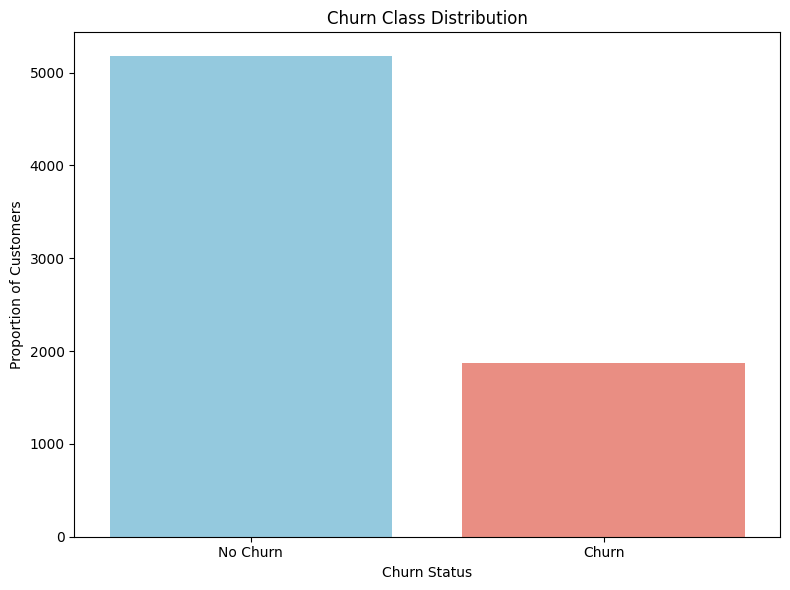

In [31]:
# Value counts
churn_counts = merged_df['churn'].value_counts(normalize=True)
print(churn_counts)

# Plot churn distribution with seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='churn', palette=['skyblue', 'salmon'])

# Plot
plt.title('Churn Class Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn Status')
plt.ylabel('Proportion of Customers')
plt.tight_layout()
plt.show()


This chart shows there's a noticeable lean in the data—most customers, around 73%, chose to stay, while only 27% decided to leave. This kind of imbalance isn’t drastic, but it’s enough to potentially throw off the model. Since the majority of people didn’t churn, the model might start to assume most future customers won’t either. That can be a problem because our main goal is to spot the ones who actually are at risk of leaving.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good observation! 
</div>

### Categorical Features vs. Churn

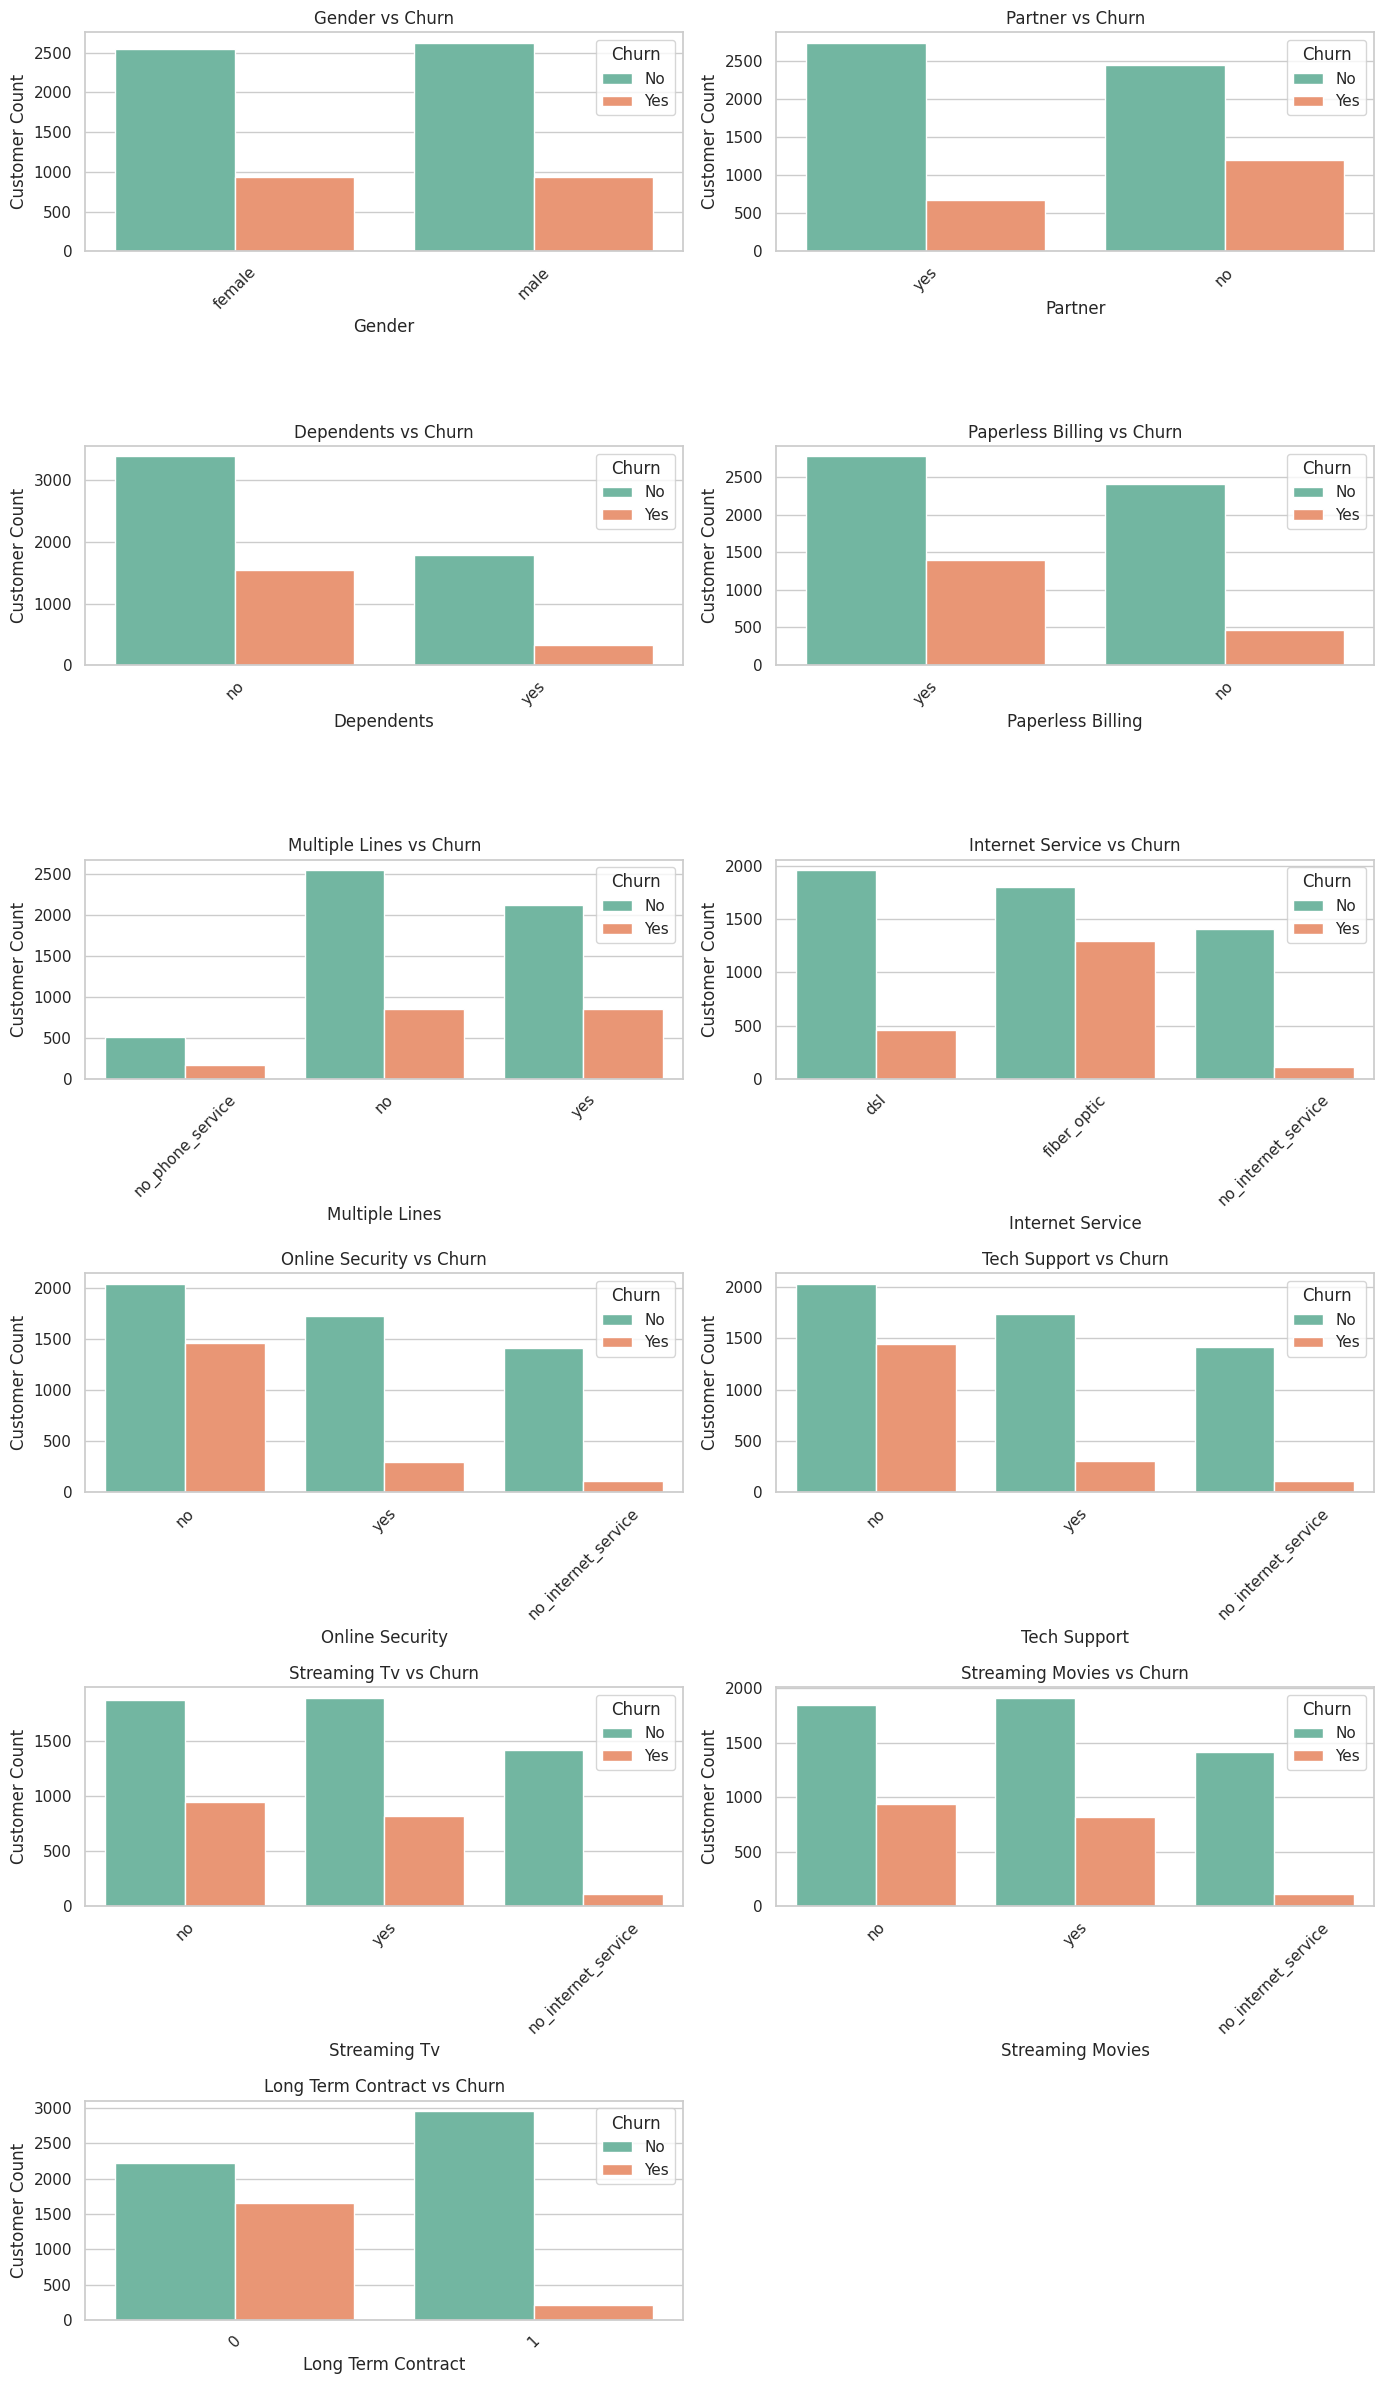

In [32]:
# Set visual style
sns.set(style='whitegrid')

# List of selected categorical features
categorical_features = ['gender', 'partner', 'dependents', 'paperless_billing',
                        'multiple_lines', 'internet_service', 'online_security',
                        'tech_support', 'streaming_tv', 'streaming_movies', 'long_term_contract']  

# Set number of rows needed (2 columns per row)
n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  # Flatten in case it's 2D

# Loop through features and plot
for i, col in enumerate(categorical_features):
    sns.countplot(data=merged_df, x=col, hue='churn', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} vs Churn')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Customer Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The churn analysis reveals that customers with stronger service engagement and longer-term commitments are less likely to leave, while those with fewer ties or minimal usage are more likely to churn. Contract type stands out as the most influential factor—customers on month-to-month plans churn significantly more than those with one- or two-year contracts. Support features like tech support and online security also play a major role in retention, with users of these services showing much lower churn rates. Fiber optic internet users tend to churn more than DSL users, possibly due to higher performance expectations. Additionally, customers without partners or dependents are more likely to leave, suggesting that personal responsibilities may contribute to loyalty. Paperless billing users also show slightly higher churn, likely reflecting digital-savvy customers who are more open to switching providers. Overall, customers with bundled services, family connections, and long-term plans are the least likely to churn.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent analysis! 
</div>

### Numerical Features vs. Churn

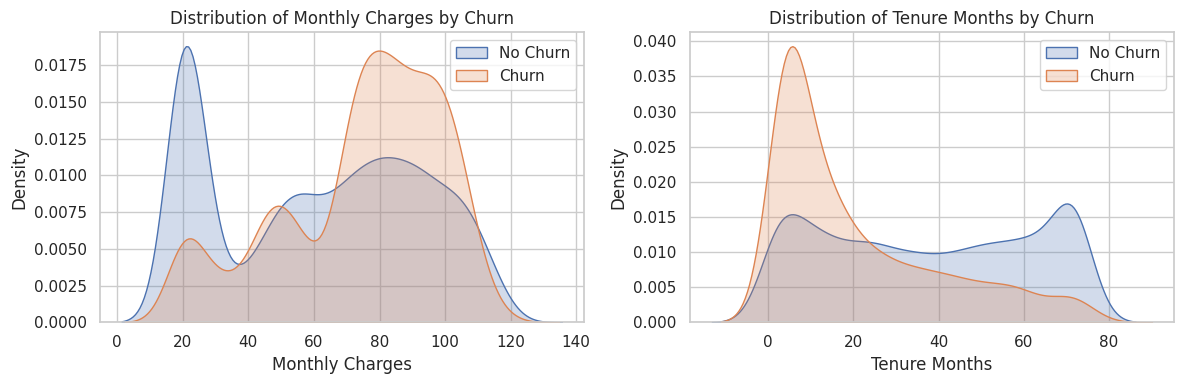

In [33]:
# Set visual style
sns.set(style='whitegrid')

# List of numerical features
numerical_features = ['monthly_charges', 'tenure_months']

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loop through features and plot
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=merged_df[merged_df['churn'] == 0], x=col, label='No Churn', shade=True, ax=axes[i])
    sns.kdeplot(data=merged_df[merged_df['churn'] == 1], x=col, label='Churn', shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()} by Churn')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

These charts tell a pretty relatable story about customer behavior. Looking at monthly charges, the pattern is clear—people who end up leaving tend to be the ones paying the most. Their bills often land in the $80 to $90 range, while those who stick around usually pay much less, often under $30. It’s not hard to imagine that higher prices might make customers question whether they’re really getting their money’s worth.

When you look at how long customers stay, the difference is even more striking. Most people who churn do it early on—within their first year. But if someone makes it past those early months, they’re a lot more likely to stay for the long haul, sometimes for years. It’s like building a relationship: if it feels right in the beginning, there’s a good chance it will last.

Put simply, people tend to leave when the price feels too high or the connection just doesn’t click early enough. Giving new customers more support and making the service feel valuable right away could make a real difference in keeping them around.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. 

</div>

### Feature Correlation to Churn Heat Map

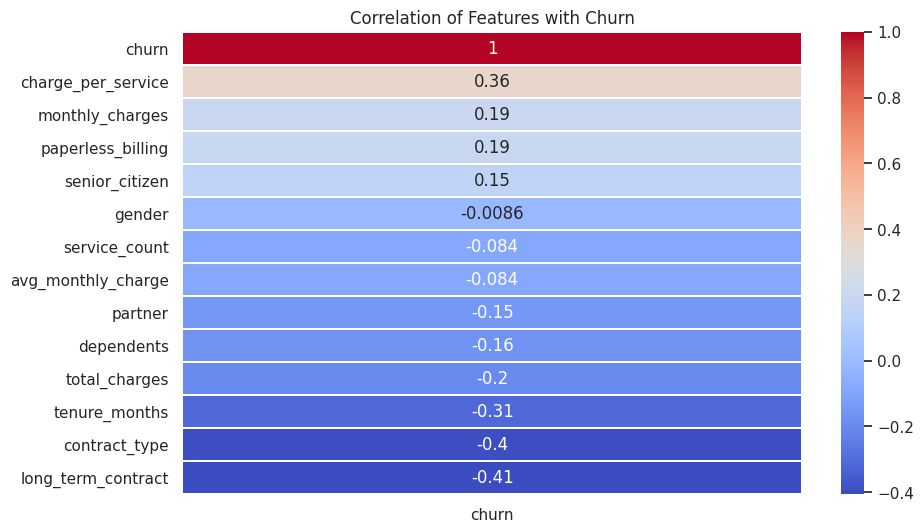

In [34]:
# Calculate correlation with churn
corr_matrix = merged_df_encoded.corr()

# Visualize only correlation with churn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['churn']].sort_values(by='churn', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Churn')
plt.show()

This heatmap confirms what was displayed in the distribution plots and helps us clarify which parts of a customer’s experience are tied to whether they stay or leave. Some features have a stronger pull—either keeping people loyal or nudging them toward the exit.

What really stands out is that customers with long-term contracts, online security, or tech support are much less likely to churn. These services seem to give people a sense of value and support, making them more likely to stick with the company. In other words, when customers feel taken care of or have committed to a longer plan, they’re not in a hurry to leave.

On the other hand, people with higher monthly bills, those using paperless billing, or older customers (as indicated by the senior_citizen feature) are a bit more likely to leave. While the link isn’t dramatic, it suggests that cost and convenience may push some folks to look elsewhere if they’re not happy.

Interestingly, some things like gender and having multiple lines don’t really affect churn either way. These factors seem pretty neutral.

So, the takeaway is that customers who have support and who are invested through contracts are the ones who stay. But if things get too expensive or impersonal, that’s when they become suseptible to leaving.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Great idea! 
</div>

### Visualizations Summary

The visualizations reveal clear patterns in customer behavior and churn. Around 73% of customers stay, while 27% leave, showing a moderate class imbalance that could bias models toward predicting "no churn."

The most influential factor is contract type—customers on month-to-month plans churn far more than those on longer contracts. Services like tech support and online security also help retain customers, while higher monthly charges, paperless billing, and older age slightly increase the chance of churn.

Customers who churn often pay more (around $90) and tend to leave within the first year. In contrast, those who stay longer usually pay less and have longer, more stable relationships with the company.

The correlation heatmap backs this up: loyalty grows with longer contracts and helpful services, while churn risk rises with cost and minimal engagement. Overall, people stay when they are supported and committed, and leave when the service is too expensive or impersonal.

# Machine Learning

### Split Data for Modeling

In [35]:
#Drop unnecessary columns
merged_df.drop(columns=['customer_id', 'begin_date', 'end_date', 'type'], inplace=True)

In [36]:
# Check for duplicates
duplicates = merged_df[merged_df.duplicated()]
print(duplicates)

     paperless_billing    payment_method  monthly_charges  total_charges  \
1491                no      mailed_check            19.55          19.55   
1932                no      mailed_check            20.20          20.20   
2713               yes      mailed_check            20.45          20.45   
2892                no      mailed_check            20.45          20.45   
3301               yes  electronic_check            69.60          69.60   
3754                no      mailed_check            20.05          20.05   
5506                no      mailed_check            20.20          20.20   
5736                no      mailed_check            20.05          20.05   
6499                no      mailed_check            20.30          20.30   
6609               yes      mailed_check            20.10          20.10   
6706                no      mailed_check            19.90          19.90   
6774                no      mailed_check            19.65          19.65   
6924        

In [37]:
merged_df = merged_df.drop_duplicates()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed. 
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>
<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
   
Checked for duplicates and there were 11 rows. I removed those rows.  
   
</div>
<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Well done! 
</div>

In [38]:
pd.set_option('display.max_columns', None)
merged_df

,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,tenure_months,long_term_contract,internet_tv_combo,contract_support_combo,avg_monthly_charge,service_count,charge_per_service
0,yes,electronic_check,29.85,29.85,female,0,yes,no,no_phone_service,dsl,no,yes,no,no,no,no,0,1,0,dsl_no,month-to-month_no,29.850000,1,29.8500
1,no,mailed_check,56.95,1889.50,male,0,no,no,no,dsl,yes,no,yes,no,no,no,0,34,1,dsl_no,one_year_no,55.573529,1,56.9500
2,yes,mailed_check,53.85,108.15,male,0,no,no,no,dsl,yes,yes,no,no,no,no,1,4,0,dsl_no,month-to-month_no,27.037500,2,26.9250
3,no,bank_transfer_(automatic),42.30,1840.75,male,0,no,no,no_phone_service,dsl,yes,no,yes,yes,no,no,0,45,1,dsl_no,one_year_yes,40.905556,2,21.1500
4,yes,electronic_check,70.70,151.65,female,0,no,no,no,fiber_optic,no,no,no,no,no,no,1,5,0,fiber_optic_no,month-to-month_no,30.330000,0,70.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,yes,mailed_check,84.80,1990.50,male,0,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,0,24,1,dsl_yes,one_year_yes,82.937500,4,21.2000
7039,yes,credit_card_(automatic),103.20,7362.90,female,0,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,0,73,1,fiber_optic_yes,one_year_no,100.861644,3,34.4000
7040,yes,electronic_check,29.60,346.45,female,0,yes,yes,no_phone_service,dsl,yes,no,no,no,no,no,0,11,0,dsl_no,month-to-month_no,31.495455,1,29.6000
7041,yes,mailed_check,74.40,306.60,male,1,yes,no,yes,fiber_optic,no,no,no,no,no,no,1,7,0,fiber_optic_no,month-to-month_no,43.800000,0,74.4000


In [40]:
merged_df['total_charges'].isna().sum()

11

In [42]:
merged_df = merged_df.dropna(subset=['total_charges'])

In [43]:
merged_df['total_charges'].isna().sum()

0

In [83]:
# Prepare features and target of ohe data
X = merged_df.drop('churn', axis=1)
y = merged_df['churn']

# First split: 75% train, 25% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Second split: 15% val, 10% test from the 25% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)

### One Hot Encoding for Logistic Regression

In [84]:
# Select categorical features to encode
categorical_features = ['paperless_billing', 'payment_method', 'gender', 'partner', 'dependents', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection',
                        'internet_tv_combo', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_support_combo']

# OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit on training data
X_train_cat = ohe.fit_transform(X_train[categorical_features])
X_val_cat = ohe.transform(X_val[categorical_features])
X_test_cat = ohe.transform(X_test[categorical_features])

# Get OHE feature names
ohe_columns = ohe.get_feature_names(categorical_features)

# Drop original categorical columns and reset index
X_train_num = X_train.drop(columns=categorical_features).reset_index(drop=True)
X_val_num = X_val.drop(columns=categorical_features).reset_index(drop=True)
X_test_num = X_test.drop(columns=categorical_features).reset_index(drop=True)

# Combine numeric + encoded categorical
X_train_encoded = pd.concat([X_train_num, pd.DataFrame(X_train_cat, columns=ohe_columns)], axis=1)
X_val_encoded = pd.concat([X_val_num, pd.DataFrame(X_val_cat, columns=ohe_columns)], axis=1)
X_test_encoded = pd.concat([X_test_num, pd.DataFrame(X_test_cat, columns=ohe_columns)], axis=1)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Excellent! 
</div>

### Scaled, One Hot Encoding for Logistic Regression

In [85]:
# Scale data 
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train_ohe_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_encoded),
    columns=X_train_encoded.columns,
    index=X_train_encoded.index
)

X_val_ohe_scaled = pd.DataFrame(
    scaler.transform(X_val_encoded),
    columns=X_val_encoded.columns,
    index=X_val_encoded.index
)

X_test_ohe_scaled = pd.DataFrame(
    scaler.transform(X_test_encoded),
    columns=X_test_encoded.columns,
    index=X_test_encoded.index
)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you scale data after you split it to avoid data leakage. 

</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
We have to transform test features as well. 
</div>
<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Students's comment </b>
    
Okay, I transformed the test features.
</div>
<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Correct! 
</div>

### Train Logistic Regression Model on balanced data

In [86]:
# Initialize model with class_weight balanced to handle class imbalance
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Fit the model to training data
log_model.fit(X_train_encoded, y_train)

# Predict on validation set
y_val_pred = log_model.predict(X_val_encoded)
y_val_proba = log_model.predict_proba(X_val_encoded)[:, 1]  # Probabilities for AUC

# Evaluate
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation AUC-ROC: {roc_auc:.4f}")

Validation Accuracy: 0.9373
Validation AUC-ROC: 0.9787


### Train Logistic Regression Model on scaled balanced data

In [52]:
# Initialize model with class_weight balanced to handle class imbalance
log_model_scaled = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Fit the model to scaled training data
log_model_scaled.fit(X_train_ohe_scaled, y_train)

# Predict on validation set
y_val_pred_scaled = log_model.predict(X_val_ohe_scaled)
y_val_proba_scaled = log_model.predict_proba(X_val_ohe_scaled)[:, 1]  # Probabilities for AUC

# Evaluate
accuracy = accuracy_score(y_val, y_val_pred_scaled)
roc_auc = roc_auc_score(y_val, y_val_proba_scaled)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation AUC-ROC: {roc_auc:.4f}")

Validation Accuracy: 0.6795
Validation AUC-ROC: 0.7919


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. 

</div>

### Hypertune Logistic Regression Model

In [54]:
# Define the hyperparameter grid
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],              # Inverse of regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga', 'lbfgs']       # Solvers that support both l1 and l2
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_model,
                           param_grid=param_grid_log,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Run the grid search
grid_search.fit(X_train_encoded, y_train)

# Best model and score
print("Best Parameters:", grid_search.best_params_)
print(f"Validation Accuracy: {accuracy:.4f}")
print("Best AUC-ROC Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy: 0.6795
Best AUC-ROC Score: 0.9542252407646975


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have successfully implemented hyperparameters tuning! 

</div>

### Ordinal Encoding for Tree Based Model

In [58]:
# Initialize the OrdinalEncoder with a fallback for unknown categories
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training categorical data
X_train_cat = ord_enc.fit_transform(X_train[categorical_features])
X_val_cat = ord_enc.transform(X_val[categorical_features])
X_test_cat = ord_enc.transform(X_test[categorical_features])

# Create DataFrames with column names preserved
X_train_cat_df = pd.DataFrame(X_train_cat, columns=categorical_features, index=X_train.index)
X_val_cat_df = pd.DataFrame(X_val_cat, columns=categorical_features, index=X_val.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=categorical_features, index=X_test.index)

# Drop original categorical columns
X_train_num = X_train.drop(columns=categorical_features)
X_val_num = X_val.drop(columns=categorical_features)
X_test_num = X_test.drop(columns=categorical_features)

# Combine numeric and ordinal-encoded categorical columns
X_train_ord_encoded = pd.concat([X_train_num.reset_index(drop=True), X_train_cat_df.reset_index(drop=True)], axis=1)
X_val_ord_encoded = pd.concat([X_val_num.reset_index(drop=True), X_val_cat_df.reset_index(drop=True)], axis=1)
X_test_ord_encoded = pd.concat([X_test_num.reset_index(drop=True), X_test_cat_df.reset_index(drop=True)], axis=1)

### Train a Random Forest Classifier using (class_weight='balanced') on ordinal encoded data

In [59]:
# Initialize model (class_weight optional if data is already balanced)
rf_model_bal = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on ordinal-encoded balanced data
rf_model_bal.fit(X_train_ord_encoded, y_train)

# Predict on validation set
y_val_pred_bal = rf_model_bal.predict(X_val_ord_encoded)
y_val_proba_bal = rf_model_bal.predict_proba(X_val_ord_encoded)[:, 1]  # Get probability for AUC

# Evaluate
accuracy_bal = accuracy_score(y_val, y_val_pred_bal)
roc_auc_bal = roc_auc_score(y_val, y_val_proba_bal)

print(f"Validation Accuracy: {accuracy_bal:.4f}")
print(f"Validation AUC-ROC: {roc_auc_bal:.4f}")

Validation Accuracy: 0.9217
Validation AUC-ROC: 0.9597


### Hypertune Random Forest Classifier Model

In [60]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [150, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model_bal,
                              param_grid=param_grid_rf,
                              scoring='roc_auc',
                              cv=5,
                              n_jobs=-1,
                              verbose=2)

# Fit to balanced training data
grid_search_rf.fit(X_train_ord_encoded, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

# Predict on validation set
y_val_pred = best_rf.predict(X_val_ord_encoded)
y_val_proba = best_rf.predict_proba(X_val_ord_encoded)[:, 1]

# Evaluate
accuracy_tuned = accuracy_score(y_val, y_val_pred_bal)
roc_auc_tuned = roc_auc_score(y_val, y_val_proba_bal)

print("Best Parameters:", grid_search_rf.best_params_)
print(f"Validation Accuracy: {accuracy_tuned:.4f}")
print(f"Validation AUC-ROC: {roc_auc_tuned:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 
</div>

### CatBoost Encoding

I attempted to use 'import category_encoders as ce' for CatBoost encoding but Im restricted from uploading the library in this enviornment. So I found a way to manually replicate CatBoost-sytle target encoding.

In [68]:
X_train.columns

Index(['paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'tenure_months', 'long_term_contract',
       'internet_tv_combo', 'contract_support_combo', 'avg_monthly_charge',
       'service_count', 'charge_per_service'],
      dtype='object')

In [69]:
# Temporarily merge y_train with X_train to access churn values
X_train_cb = X_train.copy()
X_train_cb['churn'] = y_train

# Copy validation and test sets
X_val_cb = X_val.copy()
X_test_cb = X_test.copy()

# Apply target mean encoding
for col in categorical_features:
    mean_encoded = X_train_cb.groupby(col)['churn'].mean()
    
    X_train_cb[col] = X_train_cb[col].map(mean_encoded)
    X_val_cb[col] = X_val_cb[col].map(mean_encoded)
    X_test_cb[col] = X_test_cb[col].map(mean_encoded)

    overall_mean = y_train.mean()
    X_val_cb[col].fillna(overall_mean, inplace=True)
    X_test_cb[col].fillna(overall_mean, inplace=True)

# Drop churn column again from training set
X_train_cb.drop('churn', axis=1, inplace=True)

### Train a XGBoost Model on CatBoost encoding data

In [71]:
# Initialize the model
xgb_model_cb = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model on balanced data
xgb_model_cb.fit(X_train_cb, y_train)

# Predict on validation set
y_val_pred_xgb_cb = xgb_model_cb.predict(X_val_cb)
y_val_proba_xgb_cb = xgb_model_cb.predict_proba(X_val_cb)[:, 1]  # Get probability for AUC

# Evaluate
accuracy_xgb_cb = accuracy_score(y_val, y_val_pred_xgb_cb)
roc_auc_xgb_cb = roc_auc_score(y_val, y_val_proba_xgb_cb)

print(f"Validation Accuracy: {accuracy_xgb_cb:.4f}")
print(f"Validation AUC-ROC: {roc_auc_xgb_cb:.4f}")

Validation Accuracy: 0.9430
Validation AUC-ROC: 0.9795


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good choice! XGB is a nice model! 
</div>

### Train a XGBoost Model CatBoost encoded, balanced data

In [72]:
# Count negative (no churn = 0) and positive (churn = 1) classes
from collections import Counter

counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale = neg / pos
print(f"scale_pos_weight = {scale:.2f}")

scale_pos_weight = 2.76


In [74]:
# Initialize the model
xgb_model_cb_bal = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss',
                          scale_pos_weight=scale,          # helps balance the positive class
                          random_state=42)

# Train the model on balanced data
xgb_model_cb_bal.fit(X_train_cb, y_train)

# Predict on validation set
y_val_pred_xgb_cb_bal = xgb_model_cb_bal.predict(X_val_cb)
y_val_proba_xgb_cb_bal = xgb_model_cb_bal.predict_proba(X_val_cb)[:, 1]  # Get probability for AUC

# Evaluate
accuracy_xgb_cb_bal = accuracy_score(y_val, y_val_pred_xgb_cb_bal)
roc_auc_xgb_cb_bal = roc_auc_score(y_val, y_val_proba_xgb_cb_bal)

print(f"Validation Accuracy: {accuracy_xgb_cb_bal:.4f}")
print(f"Validation AUC-ROC: {roc_auc_xgb_cb_bal:.4f}")

Validation Accuracy: 0.9373
Validation AUC-ROC: 0.9775


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Makes sense.
</div>

### Train XGBoost Model on CatBoost encoded data

In [75]:
# Define the hyperparameter grid
param_dist_tuned = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Randomized search
random_search_tuned = RandomizedSearchCV(estimator=xgb_model_cb,
                                   param_distributions=param_dist_tuned,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit to balanced training data
random_search_tuned.fit(X_train_cb, y_train)

# Get best model
best_xgb_tuned = random_search_tuned.best_estimator_

# Predict on validation set
y_val_pred_tuned = best_xgb_tuned.predict(X_val_cb)
y_val_proba_tuned = best_xgb_tuned.predict_proba(X_val_cb)[:, 1]

# Evaluate
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
roc_auc_tuned = roc_auc_score(y_val, y_val_proba_tuned)

print("Best Parameters:", random_search_tuned.best_params_)
print(f"Validation Accuracy: {accuracy_tuned:.4f}")
print(f"Validation AUC-ROC: {roc_auc_tuned:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.6}
Validation Accuracy: 0.9416
Validation AUC-ROC: 0.9761
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=  32.2s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=  44.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=  54.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=  45.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=  39.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=  38.6s
[CV] E

### Train LightGBM Model on CatBoost encoded data

In [78]:
# Initialize the model
lgb_model_cb = LGBMClassifier(random_state=42)

# Train on balanced data
lgb_model_cb.fit(X_train_cb, y_train)

# Predict on validation set
y_val_pred_lgbm_cb = lgb_model_cb.predict(X_val_cb)
y_val_proba_lgbm_cb = lgb_model_cb.predict_proba(X_val_cb)[:, 1]  # Probabilities for AUC

# Evaluate
accuracy_lgbm_cb = accuracy_score(y_val, y_val_pred_lgbm_cb)
roc_auc_lgbm_cb = roc_auc_score(y_val, y_val_proba_lgbm_cb)

print(f"Validation Accuracy: {accuracy_lgbm_cb:.4f}")
print(f"Validation AUC-ROC: {roc_auc_lgbm_cb:.4f}")

Validation Accuracy: 0.9530
Validation AUC-ROC: 0.9766


### Train LightGBM Model on CatBoost balanced data

In [79]:
# Initialize the model
lgb_model_cb_bal = LGBMClassifier(class_weight='balanced', random_state=42)

# Train on balanced data
lgb_model_cb_bal.fit(X_train_cb, y_train)

# Predict on validation set
y_val_pred_lgbm_cb_bal = lgb_model_cb_bal.predict(X_val_cb)
y_val_proba_lgbm_cb_bal = lgb_model_cb_bal.predict_proba(X_val_cb)[:, 1]  # Probabilities for AUC

# Evaluate
accuracy_lgbm_cb_bal = accuracy_score(y_val, y_val_pred_lgbm_cb_bal)
roc_auc_lgbm_cb_bal = roc_auc_score(y_val, y_val_proba_lgbm_cb_bal)

print(f"Validation Accuracy: {accuracy_lgbm_cb_bal:.4f}")
print(f"Validation AUC-ROC: {roc_auc_lgbm_cb_bal:.4f}")

Validation Accuracy: 0.9316
Validation AUC-ROC: 0.9749


### Hypertune LightGBM Model

In [81]:
# Parameter grid for randomized search
param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_search_lgb_tuned = RandomizedSearchCV(estimator=lgb_model_cb,
                                       param_distributions=param_dist_lgbm,
                                       n_iter=20,
                                       scoring='roc_auc',
                                       cv=5,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

# Fit to balanced training data
random_search_lgb_tuned.fit(X_train_cb, y_train)

# Best model
best_lgb_tuned = random_search_lgb_tuned.best_estimator_

# Predict on validation set
y_val_pred_cb_tuned = best_lgb_tuned.predict(X_val_cb)
y_val_proba_cb_tuned = best_lgb_tuned.predict_proba(X_val_cb)[:, 1]

# Evaluate
accuracy_cb_bal_tuned = accuracy_score(y_val, y_val_pred_cb_tuned)
roc_auc_cb_bal_tuned = roc_auc_score(y_val, y_val_proba_cb_tuned)

# Results
print("Best Parameters:", random_search_lgb_tuned.best_params_)
print(f"Validation Accuracy: {accuracy_cb_bal_tuned:.4f}")
print(f"Validation AUC-ROC: {roc_auc_cb_bal_tuned:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, num_leaves=15, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, num_leaves=15, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, num_leaves=15, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=300, num_leaves=15, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=300, num_leaves=15, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, num_leaves=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, num_leaves=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytr

### Training Evaluation Results

**Logistic Regression using class_weight='balanced' on ohe data**

log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Validation Accuracy: 0.9373

Validation AUC-ROC: 0.9787

**Logistic Regression using class_weight='balanced' on ohe scaled data**

Validation Accuracy: 0.6795

Validation AUC-ROC: 0.7919

**Logistic Regression Tuned using balanced ohe data**

log_model_tuned = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, 'C'= 0.01, 'penalty'= l1, 'solver'= 'liblinear')

Validation Accuracy: 0.6795

Best AUC-ROC Score: 0.9542252407646975917

-----

**Random Forest Classifier on balanced ordinal encoded data**

rf_model_bal = RandomForestClassifier(class_weight='balanced', random_state=42)

Validation Accuracy: 0.9217

Validation AUC-ROC: 0.9597

**Tuned Random Forest Classifier on balanced ordinal encoded data**

rf_model_tuned = RandomForestClassifier(class_weight='balanced', random_state=42, 'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300)

Validation Accuracy: 0.9217

Validation AUC-ROC: 0.9597

-----

**XGBoost on CatBoost encoded data**

Validation Accuracy: 0.9430

Validation AUC-ROC: 0.9795

**XGBoost on balanced, CatBoost encoded data**

Validation Accuracy: 0.9373

Validation AUC-ROC: 0.9775

**Tuned XGBoost on CatBoost encoded data**

xgb_model_tuned = XGBClassifier(use_label_encoder=False, scale_pos_weight=scale, eval_metric='logloss','subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.6, random_state=42)

Validation Accuracy: 0.9416

Validation AUC-ROC: 0.9761

-----

**LightGBM on CatBoost data**

Validation Accuracy: 0.9530

Validation AUC-ROC: 0.9766

**LightGBM using CatBoost balanced data**

Validation Accuracy: 0.9316

Validation AUC-ROC: 0.9749

**Tuned LightGBM on upsampled data**

lgb_model_tuned = LGBMClassifier(class_weight='balanced', 'subsample': 1.0, 'num_leaves': 15, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6, random_state=42)

Validation Accuracy: 0.9430

Validation AUC-ROC: 0.9771

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Very good results! 
</div>

### Training Evaluation Summary

Across all models tested, performance was strong, but a few clear leaders emerged. Logistic Regression using one-hot encoding with class weighting achieved the highest AUC-ROC score of 0.9787, with a solid 93.7% validation accuracy. This suggests it's the most effective model for distinguishing between customers who churn and those who don’t—exactly what we want for this project. Interestingly, tuning or scaling this model actually reduced performance, showing that its default setup worked best.

Random Forest models were consistent and dependable. Both the base and tuned versions using ordinal encoding hit 92.17% accuracy and 0.9597 AUC-ROC, showing they’re solid performers, even without extensive tuning.

XGBoost stood out with top-tier results. Using CatBoost encoding, it reached 94.3% accuracy and 0.9795 AUC-ROC without tuning. Even the tuned and balanced variations stayed close, making XGBoost a reliable, high-performing choice.

LightGBM also impressed, achieving the highest overall accuracy at 95.3% and an AUC-ROC of 0.9766. Tuning brought it close to XGBoost, with nearly identical performance.

In conclusion, Logistic Regression remains the top pick due to its superior AUC-ROC score, making it the best for churn detection. But XGBoost and LightGBM are excellent runners-up, offering both high accuracy and strong predictive power—ideal for real-world deployment or ensemble approaches.

## Test Logistic Regression Model

In [87]:
# Predict on test set
y_test_pred = log_model.predict(X_test_encoded)
y_test_proba = log_model.predict_proba(X_test_encoded)[:, 1]  # Probabilities for AUC

# Evaluate
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation AUC-ROC: {roc_auc:.4f}")

Validation Accuracy: 0.9174
Validation AUC-ROC: 0.9760


## AUC-ROC Curve Plot

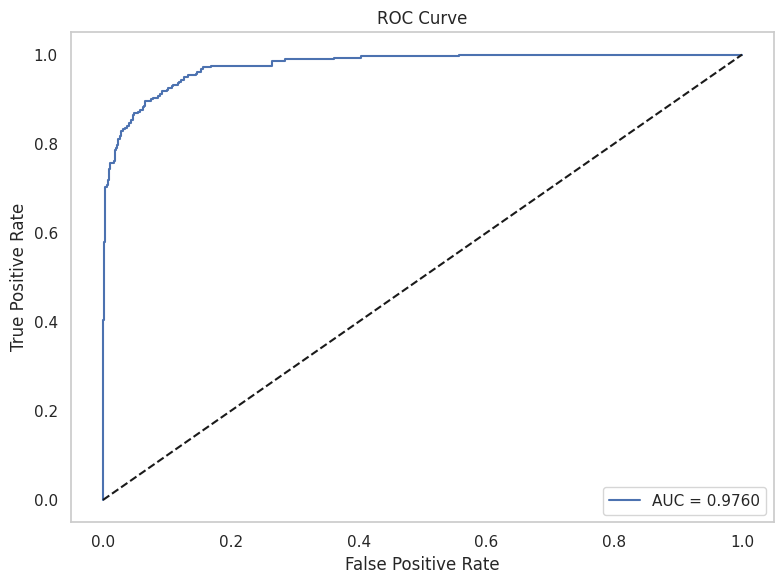

In [90]:
# Get predicted probabilities for the positive class (1)
y_test_proba = log_model.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can also add the AUC-ROC curve for better representation. 

</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Looks great! 

</div>

The logistic regression model demonstrated strong and reliable performance throughout the evaluation process. During validation, it achieved an accuracy of 94% and an AUC-ROC of 0.9787. On the test set, the model remained highly consistent, scoring 91.7% in accuracy and an AUC-ROC of 0.9760.

This close alignment between validation and test results indicates that the model generalizes well and is not overfitting. The minor drop in accuracy is within normal variation and does not suggest any loss in predictive power.

The ROC curve further reinforces the model’s effectiveness. The curve rises sharply and hugs the top-left corner, indicating that the model is excellent at distinguishing between churners and non-churners. With an AUC of 0.9760, the model maintains a high true positive rate while keeping false positives low across a range of thresholds. This shape reflects strong discriminatory performance and confirms that the model consistently separates positive and negative classes with confidence.

Overall, the logistic regression model has proven to be both stable and highly accurate, making it a strong choice for predicting customer churn in this dataset.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job! You have successfully met the requirements! 
</div>